In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/KMeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


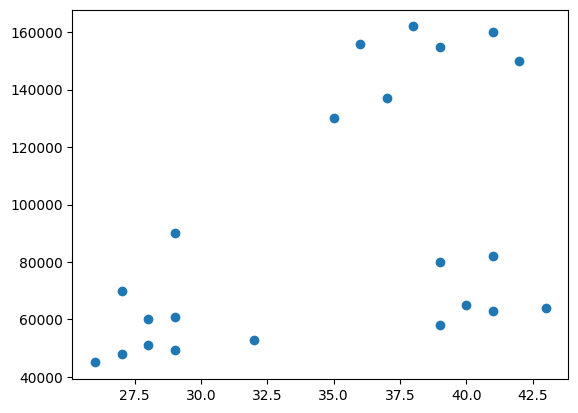

In [4]:
plt.scatter(df.Age, df['Income($)'])

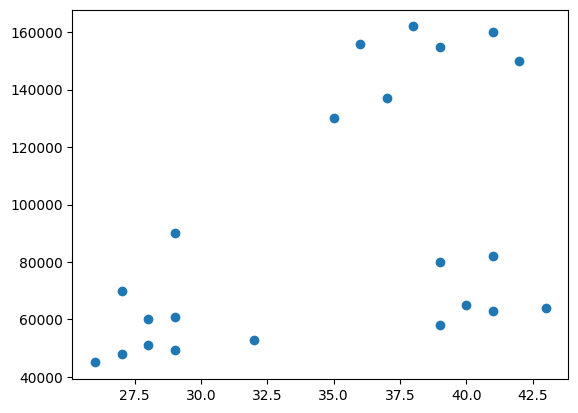

In [5]:
plt.scatter(df.Age, df['Income($)'])

In [9]:
cluster = KMeans(n_clusters = 3)
y_pred = cluster.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


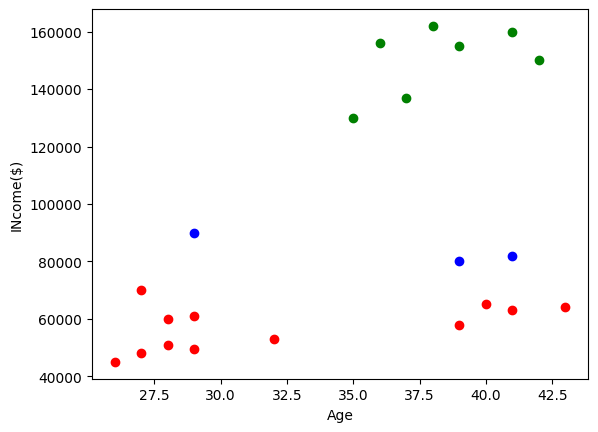

In [11]:
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]

plt.scatter(df_1['Age'], df_1['Income($)'], color = 'r')
plt.scatter(df_2['Age'], df_2['Income($)'], color = 'g')
plt.scatter(df_3['Age'], df_3['Income($)'], color = 'b')

plt.xlabel('Age')
plt.ylabel('INcome($)')
plt.show()

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [14]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [15]:
y_pred = cluster.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [16]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [17]:
cluster.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income($)')

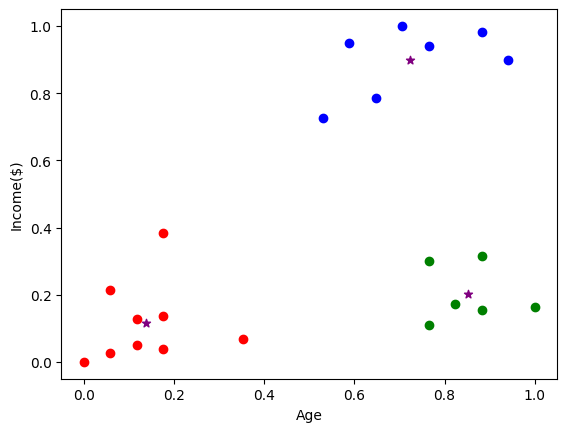

In [18]:
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]

plt.scatter(df_1['Age'], df_1['Income($)'], color = 'r')
plt.scatter(df_2['Age'], df_2['Income($)'], color = 'g')
plt.scatter(df_3['Age'], df_3['Income($)'], color = 'b')
plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], color = 'purple', marker = '*')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [19]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

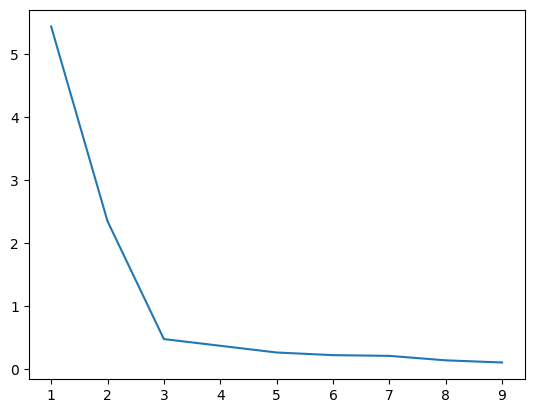

In [20]:
plt.plot(k_rng, sse)